## Biodiversity mapping

### TODO: get for multiple species to represent EOVs

Search for the order Scleractinia and extract all records. We will use `pyobis` to fetch data and then visualize.




Searching the order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363) and drill down to all species.

AphiaID 1363 (urn:lsid:marinespecies.org:taxname:1363)

## installing & importing modules

In [ ]:
try:
  import pyobis
except:
  %pip -q install pyobis
  import pyobis

try:
  import geoplot
except:
  %pip -q install geoplot
  import geoplot

try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

try:
  import geodatasets
except:
  %pip -q install geodatasets
  import geodatasets


from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

**Known Bug**: Need to reinstall shapely on Google Colab since it causes crash. And then restart once.

In [5]:
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.1.1-cp311-cp311-linux_x86_64.whl size=1415770 sha256=03fc222732951d3f12a19029131eeb06c82434e34b240a7688b29d9d4f338faf
  Stored in directory: /home/tylar/.cache/pip/wheels/9c/c4/57/c18c428060d50868570c669f7ff170e1a3fd8ff6ed854cd27e
Successfully built shapely

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## grabbing the data

Since our analysis will be highly dependent on the depth parameter, we will choose only non NaN values.

In [ ]:

from pyobis import occurrences

# define depth range
STARTDEPTH = 0
ENDDEPTH = 30

# create empty df
df = pd.DataFrame()
# for taxa in seagrasses EOV aphiaID list
# ref: https://github.com/ioos/marine_life_data_network/blob/main/eov_taxonomy/IdentifierList.csv
seagrasses_ids = [143769, 143770, 143751, 143768, 234030]
for taxa_id in seagrasses_ids:
    query = occurrences.search(taxonid=taxa_id, startdepth=STARTDEPTH, enddepth=ENDDEPTH)
    df_taxa = query.execute()
    df = pd.concat([df, df_taxa], ignore_index=True)

print(df.head())


2025-06-09 13:43:57 - pyobis.obisutils - INFO - 15083 to be fetched. Estimated time =0.648048672676086549 seconds
2025-06-09 13:43:57 - pyobis.obisutils - INFO - Fetching: [██████████████████████████████████████████████████████████████████..................................] 10000/15083
2025-06-09 13:44:09 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 15083/15083
2025-06-09 13:44:14 - pyobis.obisutils - INFO - Fetched 15083 records.
2025-06-09 13:44:15 - pyobis.obisutils - INFO - 36455 to be fetched. Estimated time =1.3217892110347749242 seconds
2025-06-09 13:44:15 - pyobis.obisutils - INFO - Fetching: [███████████████████████████.........................................................................] 10000/36455
2025-06-09 13:44:34 - pyobis.obisutils - INFO - Fetching: [██████████████████████████████████████████████████████..............................................] 20000/36455
2025-06-

## visualization

### 1. year-wise distribution
Let us see the year-wise distribution of records.

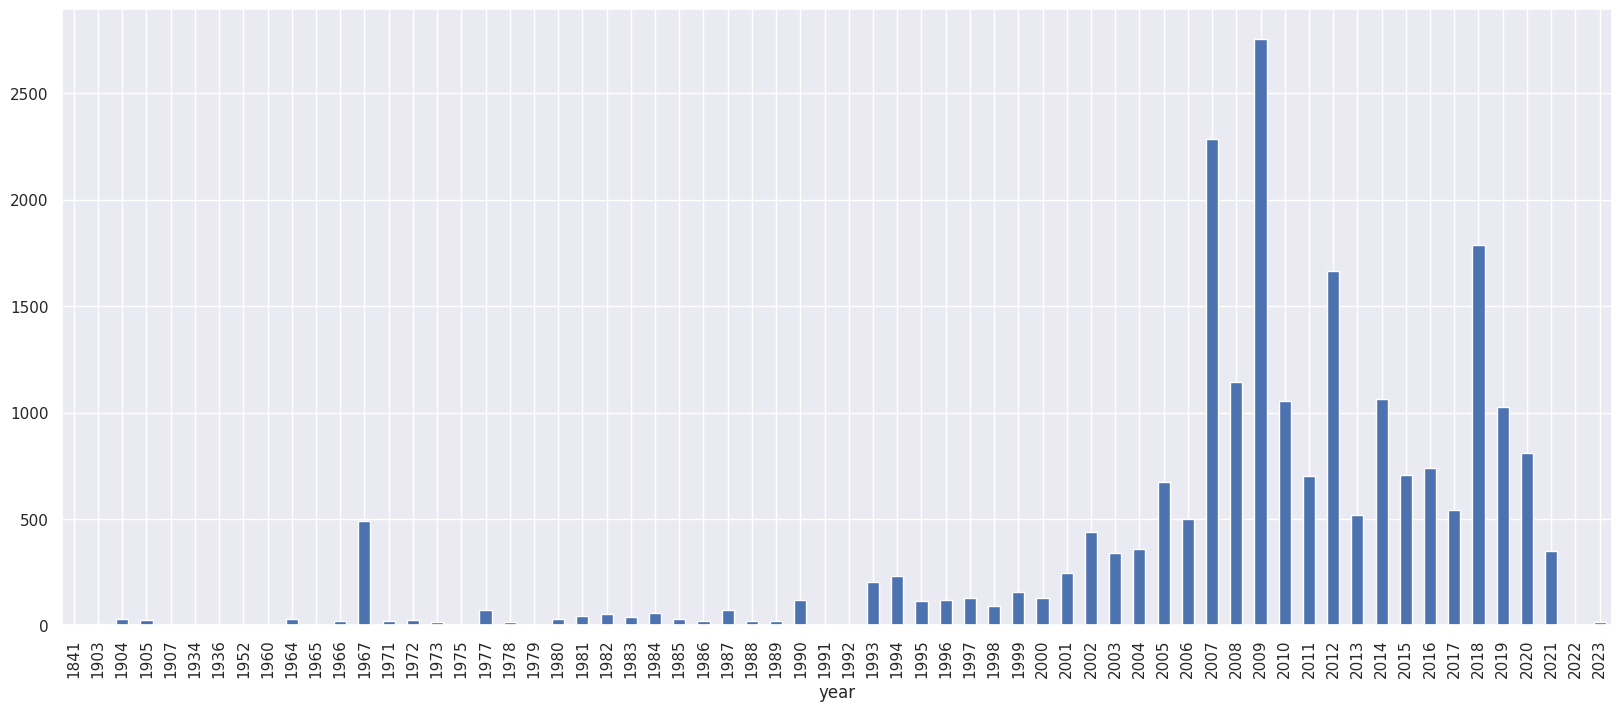

In [21]:
ax = df.groupby("year").date_mid.count().plot.bar(figsize = (20,8))

Patterns in the number of records through time are more likely due to sampling bias than changes in taxa population.

### with latitude and longitude stacked side-by-side

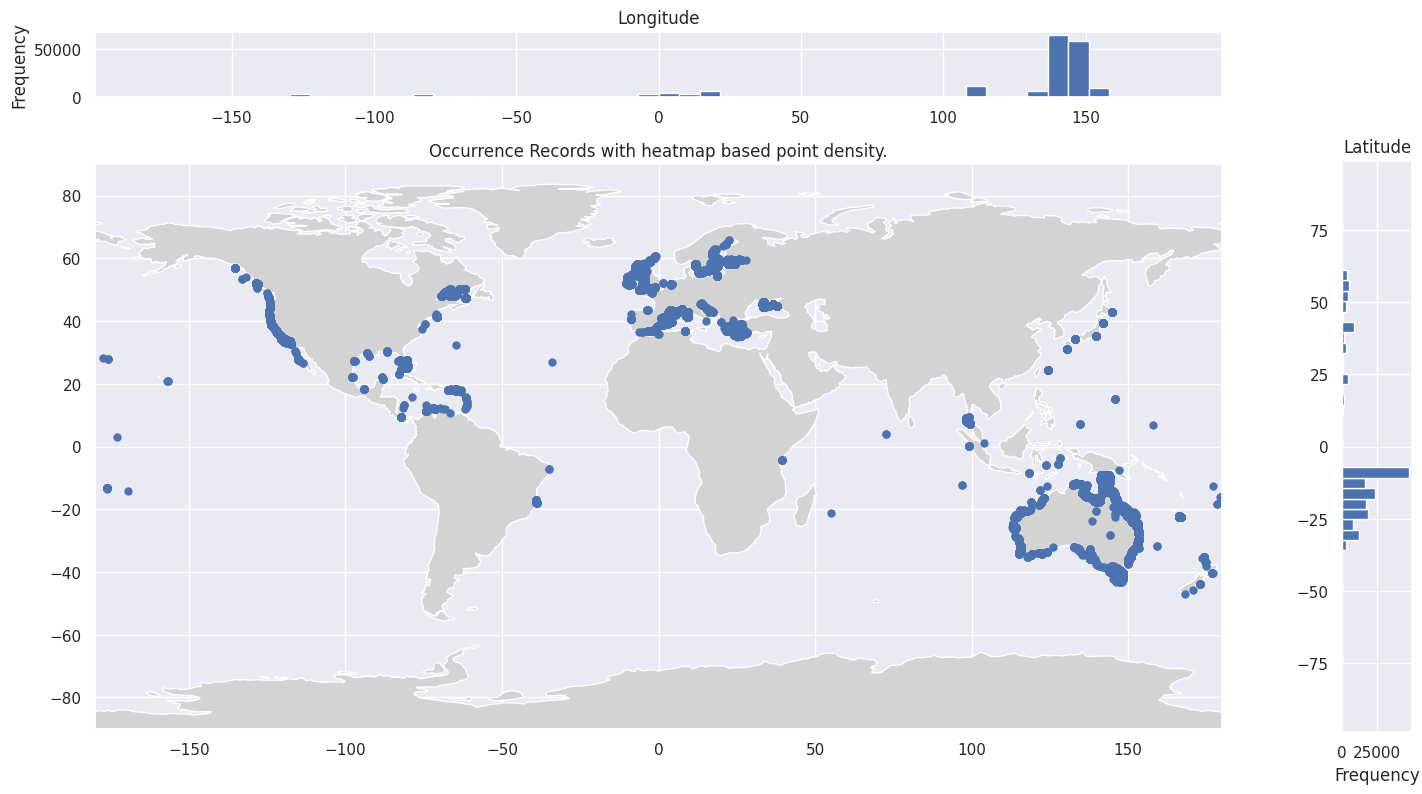

In [20]:
# getting the basemap
countries = gpd.read_file(geodatasets.get_path("naturalearth.land"))


f, axes = plt.subplots(2, 2, figsize=(17,9.1), gridspec_kw={'width_ratios': [16, 1], 'height_ratios': [1, 8.7]})
df["decimalLongitude"].astype(int).plot.hist(ax=axes[0][0], bins=50, range=(-180, 180))
axes[0][0].set_title("Longitude")

axes[0][1].set_facecolor('white')
axes[0][1].tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)

countries.plot(color="lightgrey", figsize=(16, 8.4), ax = axes[1][0])
sns.scatterplot(data=df, x="decimalLongitude", y="decimalLatitude", linewidth=0, ax=axes[1][0])

axes[1][0].set_xlim(-180,180)
axes[1][0].set_ylim(-90, 90)
axes[1][0].set_title("Occurrence Records with heatmap based point density.")
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
df["decimalLatitude"].astype(int).plot.hist(orientation='horizontal', ax=axes[1][1], bins=50, range=(-90, 90))

axes[1][1].set_title("Latitude")
plt.show()

In [ ]:
# save df to csv
df.to_csv("seagrasses.csv", index=False)

--------------------
--------------------